In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

In [2]:
df = pd.read_csv('/Volumes/transcend/大檔案/Taxi/NYT/test.csv')

In [9]:
df['key'] = pd.to_datetime(df['key'], format='%Y-%m-%d %H:%M:%S')
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'].str.replace('UTC',''), format='%Y-%m-%d %H:%M:%S')

In [13]:
df.head(2)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,weekday,hour
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.320991,2015,1,Tuesday,13
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.423802,2015,1,Tuesday,13


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 8 columns):
key                  9914 non-null datetime64[ns]
pickup_datetime      9914 non-null datetime64[ns]
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
distance             9914 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(1)
memory usage: 619.7 KB


### 新增欄位

In [6]:
import geopy.distance
dis = []
for i in tqdm_notebook(range(len(df))):
    try:
        dis.append(geopy.distance.vincenty((df['pickup_latitude'][i],df['pickup_longitude'][i]),(df['dropoff_latitude'][i],df['dropoff_longitude'][i])).km)
    except:
        print(i)
        break
df['distance'] = pd.DataFrame(dis)

/Users/andy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.


In [11]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['weekday'] = df['pickup_datetime'].dt.weekday
df['weekday'] = df['weekday'].replace([0, 1, 2, 3, 4, 5, 6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
df['hour'] = df['pickup_datetime'].dt.hour

In [14]:
df.head(2)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,weekday,hour
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.320991,2015,1,Tuesday,13
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.423802,2015,1,Tuesday,13


## EDA

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"/System/Library/Fonts/STHeiti Light.ttc")

In [19]:
df[df['distance']==0].head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,weekday,hour
121,2014-06-14 13:39:00.000000191,2014-06-14 13:39:00,-73.980590,40.747682,-73.980590,40.747682,1,0.0,2014,6,Saturday,13
279,2010-09-05 22:31:32.000000200,2010-09-05 22:31:32,-74.047394,40.785789,-74.047394,40.785789,1,0.0,2010,9,Sunday,22
318,2009-06-10 16:55:00.000000131,2009-06-10 16:55:00,-73.985862,40.744027,-73.985862,40.744027,1,0.0,2009,6,Wednesday,16
417,2011-06-24 12:03:00.000000145,2011-06-24 12:03:00,-73.964615,40.777620,-73.964615,40.777620,1,0.0,2011,6,Friday,12
423,2011-06-24 12:03:00.000000860,2011-06-24 12:03:00,-73.955065,40.771505,-73.955065,40.771505,1,0.0,2011,6,Friday,12


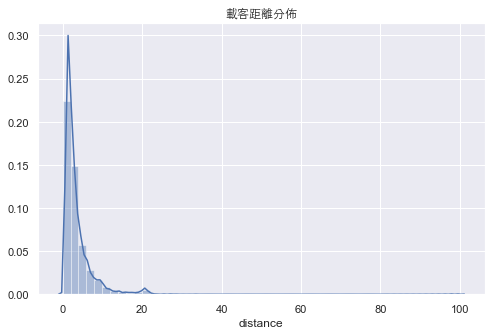

CPU times: user 465 ms, sys: 73.4 ms, total: 538 ms
Wall time: 388 ms


In [17]:
%%time
sns.distplot(df['distance'])
plt.title("載客距離分佈",fontproperties=font,size=12)
plt.gcf().set_size_inches(8,5)
plt.show()